In [1]:
import pandas as pd
import causalpy as cp

import matplotlib.pyplot as plt

In [2]:
COLORS = [
    '#00B0F0',
    '#FF0000',
    '#B0F000',
    '#EC9704'
]

# Chapter 11.2

For this notebook use the environment `causal-pymc`

To install it:

`conda create -f causal-pymc.yml`

## Causality & Time Series: When An Econometrician Goes Bayesian

### Data

In [3]:
# Read in the data
data = pd.read_csv(r'./data/gt_social_media_data.csv')

In [4]:
data.head()

,date,twitter,linkedin,tiktok,instagram
0,2022-05-15,55,9,23,59
1,2022-05-16,54,18,20,59
2,2022-05-17,54,20,23,57
3,2022-05-18,54,20,21,55
4,2022-05-19,49,23,21,52


In [5]:
# Datetime to index 
data.index = pd.to_datetime(data['date'])
data = data.drop('date', axis=1)

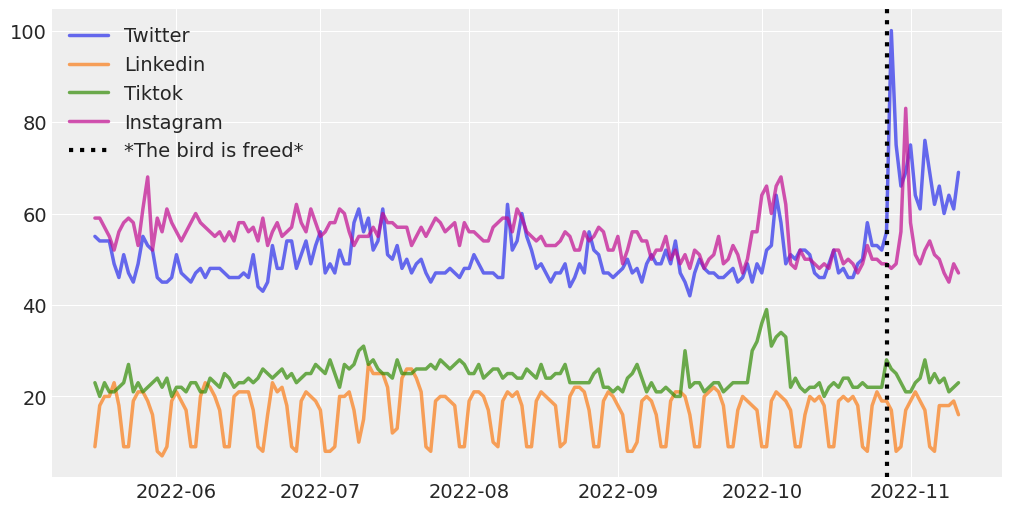

In [6]:
# Plot the data
plt.figure(figsize=(10, 5))

for i, series in enumerate(data.columns):
    plt.plot(data[series], label=series.title(), lw=2.5, alpha=.7)
    
plt.axvline(pd.to_datetime('2022-10-27'), color='black', lw=3, ls='dotted', label='*The bird is freed*')
plt.legend()
plt.show()

In [7]:
# Get the treatment time index
treatment_index = pd.to_datetime('2022-10-28')

### Modeling

In [8]:
# Build the model
model = cp.pymc_models.WeightedSumFitter()

# Define the model
formula = 'twitter ~ 0 + tiktok + linkedin + instagram'

# Run the experiment
results = cp.pymc_experiments.SyntheticControl(
    data,
    treatment_index,
    formula=formula,
    model=model,
)

/tmp/ipykernel_45789/3791984339.py:8: DeprecationWarning: cp.pymc_experiments.SyntheticControl is deprecated and will be removed in a future release. Please use:
        import causalpy as cp
        cp.SyntheticControl(...)
  results = cp.pymc_experiments.SyntheticControl(
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, sigma]
/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=45789) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=45789) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=45789) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()


/home/lars/temp/causal_inference/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" 
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=45789) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.
Sampling: [beta, sigma, y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]


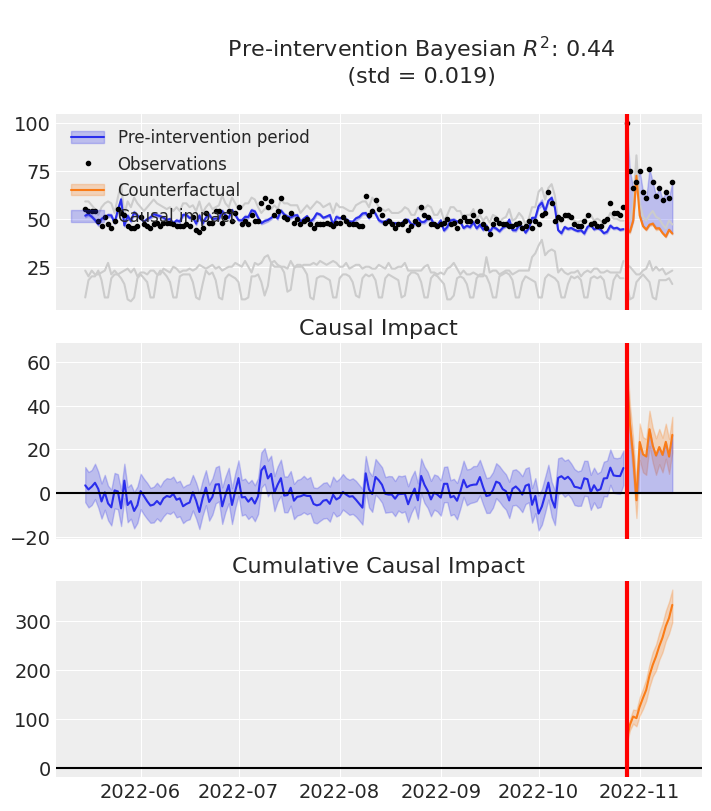

In [9]:
# Plot results
results.plot(plot_predictors=True)
plt.show()

In [10]:
# Print results summary
results.summary()

==================================Pre-Post Fit==================================
Formula: twitter ~ 0 + tiktok + linkedin + instagram
Model coefficients:
    tiktok     0.057, 94% HDI [0.0032, 0.15]
    linkedin   0.11, 94% HDI [0.033, 0.15]
    instagram  0.84, 94% HDI [0.81, 0.86]
    sigma      4.3, 94% HDI [3.9, 4.8]
